<center>
    <h1 id='demographic-filtering' style='color:#7159c1; font-size:350%'>Demographic Filtering</h1>
    <i style='font-size:125%'>The simplest Recommender Algorithm</i>
</center>

> **Topics**

```
- ✨ Introduction
- ✨ Demographic Filtering
- ✨ Arithmetic Mean
- ✨ Cumulative Mean
- ✨ Bayesian Mean
- ✨ Popularity
- ✨ Recommendation Results
```

In [1]:
# ---- Imports ----
import matplotlib.pyplot as plt             # pip install matplotlib
import mplcyberpunk                         # pip install mplcyberpunk
import numpy as np                          # pip install numpy
import pandas as pd                         # pip install pandas
import seaborn as sns                       # pip install seaborn

# ---- Constants ----
BAYESIAN_MEAN_QUANTILE = (0.75)
DATASETS_PATH = ('./datasets')
SEED = (20231212)

# ---- Settings ----
np.random.seed(SEED)
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
plt.style.use('cyberpunk')

# ---- Functions ----
def plot_top_10_animes(df, plot_title, x_axis, y_axis, limit):
    """
    \ Description:
        - plots a horizontal bar plot of the recommended animes;
        - the x-axis corresponds to the mean score;
        - the y-axis corresponds to the anime title;
        - x-axis limit.
    
    \ Parameters:    
        - df: Pandas DataFrame;
        - plot_title: string;
        - x_axis: string (must be a present column in 'df' parameter);
        - y_axis: string (must be a present column in 'df' parameter).
    """
    plt.title(plot_title)
    plt.xlim(right=limit)

    sns.barplot(
        data=df
        , x=x_axis
        , y=y_axis
        , palette='Purples'
    )

    for index, score in enumerate(df[x_axis]): plt.text(score + 0.2, index + 0.09, str(round(score, 2)))

    plt.show()
    
def bayesian_mean(row, minimum_ratings, full_df_arithmetic_mean):
    """
    \ Description:
        - calculates the Bayesian Mean Score of a DataFrame Row;
        - and returns the result.
    
    \ Parameters:
        - row: Pandas DataFrame Row;
        - minimum_ratings: float;
        - full_df_arithmetic_mean: float.
        
    """
    return (
        (row.scored_by / (row.scored_by + minimum_ratings)) * row.score                  # item's Arithmetic Mean Weight
    ) 
    + (
        (minimum_ratings / (row.scored_by + minimum_ratings)) * full_df_arithmetic_mean  # system's Arithmetic Mean Weight
    )

<h1 id='0-introduction' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>✨ | Introduction</h1>

Recommendation Systems are present everyday in our lives helping us to find the perfect anime to watch on Crunchyroll, or to binge watch that show on Netflix, keep watching related YouTube videos or even to buy new products on Amazon. I can spend the whole day listing examples about this system, but I think that you got the glimpse where Recommendation Systems are used, don't you?

However, have you ever get bored on Netflix and Instagram because they only recommend items related to the same topic? It is not because I liked two videos about cars on Instagram that I am a huge fan of cars and want to see only reels and posts about it. Or it is not because I saw a gamer chair price on Amazon that I want to buy only gamer chairs. When you keep receiving recommendations only related to a especific topic or product, we say that you are into a Limited Bubble of Recommendations.

Limited Bubble of Recomendations tends to make companies lose customers, so, in order to minimize these bubbles and to expand the recommendations' diversity, algorithms have been tuned and new variables have been considered to the model.

Nowadays, there are four main Recommendation Algorithms: `Demographic Filtering, Content-Based Filtering, Collaborative Filtering and Hybrid Filtering`. We are going to dive into the first one in this notebook taking the animes dataset into context!!

<h1 id='1-demographic-filtering' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>✨ | Demographic Filtering</h1>

`Demographic Filtering` recommends animes that are popular between the users, that is, the animes with higher Bayesian or Arithmetic Mean Score and Popularity Rank. If you use Netflix, you probably already stumbled upon to some series marked as `Hot` or `Everyone is watching`. If that's so, congrats, that is a real-world Demographic Filtering Recommendation!! To make things even clearer, assume that Bleach, Oregairu and Jujutsu Kaisen are the animes with higher scores on a stream platform and it uses Demographic Filtering to recommend the animes. Guess what? The platform will recommend these very animes to all users!!

About the advantages:

> **Less Data Required** - `since it uses the Mean Score for recommendation, only animes data is required, ignoring the users data`;

> **Less Computational Time and Cost** - `consequently, the model training takes less time and cost to compute`;

> **Simple Evaluation Metrics** - `the metrics used for evaluation (Bayesian Mean Score, Arithmetic Mean Score and Popularity Rank) are not complicated to understand and to apply`.

<br />

Disadvantages-wise:

> **Poor Recommendations** - `bad recommendations are made since this technique generalizes the taste of all users to only one: The animes with higher Score and Popularity`.

<br />

The image below ilustrates how this technique works:

<br />

<figure style='text-align:center'>
    <img style='border-radius:20px' src='./assets/0-demographic-filtering.png' alt='Demographic Filtering Diagram' />
    <figcaption>Figure 1 - Demographic Filtering Diagram. By <a href='https://www.width.ai/post/recommender-systems-recommendation-systems'>Matt Payne - Recommender Systems For Business - A Gentle Introduction©</a>.</figcaption>
</figure>

<br /><br />

In the next three remaning sessions, we are going to explain and discuss the metrics used in this Algorithm and discover why Bayesian Mean is the best choice.

<h1 id='2-arithmetic-mean' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>✨ | Arithmetic Mean</h1>

`Arithmetic Mean` is the most known way to calculate means and you probably studied about it on school during your Basic Statistics classes. In few words, the metric works adding all elements and dividing by the number of elements, the result corresponds to the mean value. If you are a math person, the equation below may ring a bell:

```python
arithmetic_mean = sum(x) / len(x)
```

$$
\overline X = \frac {\sum_{i=1}^{n} (x)} {n}
$$

where:

- x: element value;
- n: total number of elements.

<br />

Even though we have a tendency to apply the metric for most scenarios, Arithmetic Mean can be a problem for Recommendation System Models due to the difference between the score value and the amount of scores.

For instance, picture an anime that has an Arithmetic Mean Score of 9.8 and only 100 votes, and another anime with a Mean Score of 8.5 and 100,000 votes. Which one is better? The one with the higher score and less votes or the one with the smaller score and more votes?

In this case and statistically speaking, it is correct to assume that the one with the smaller score and more votes is the better because the amount of votes for the first anime is too few that its Mean is not significantly considerable. There is a possibility that a bunch a users that will not like the anime did not watch and rated it already.

So, we have just stumbled upon a problem: `there are situations the Arithmetic Mean is not suitable and can compromise Recommendation Systems Models`. We will discuss how to get around this problem later, for now, let's see what animes would be recommended by a Demographic Filtering Algorithm using Arithmetic Mean as metric.

In [2]:
# ---- Reading Dataset ----
animes_df = pd.read_csv(f'{DATASETS_PATH}/anime-transformed-dataset-2023.csv', index_col='id')
animes_df = animes_df.loc[animes_df.score > 0][['title', 'score', 'scored_by', 'popularity']]

In [3]:
# ---- Top 10 Animes - Arithmetic Mean - Table ----
arithmetic_mean_top_10_animes = animes_df.sort_values(by='score', ascending=False).head(10)
arithmetic_mean_top_10_animes.at[9969, 'title'] = 'Gintama 2' # seaborn does not plot duplicated names :(
arithmetic_mean_top_10_animes[['title', 'score']]

,title,score
id,,
5114,fullmetal alchemist brotherhood,9.10
41467,bleach sennen kessen-hen,9.07
9253,steins gate,9.07
28977,gintama,9.06
38524,shingeki no kyojin season 3 part 2,9.05
43608,kaguya-sama wa kokurasetai ultra romantic,9.05
51535,shingeki no kyojin the final season - kanketsu...,9.05
11061,hunter x hunter 2011,9.04
39486,gintama the final,9.04


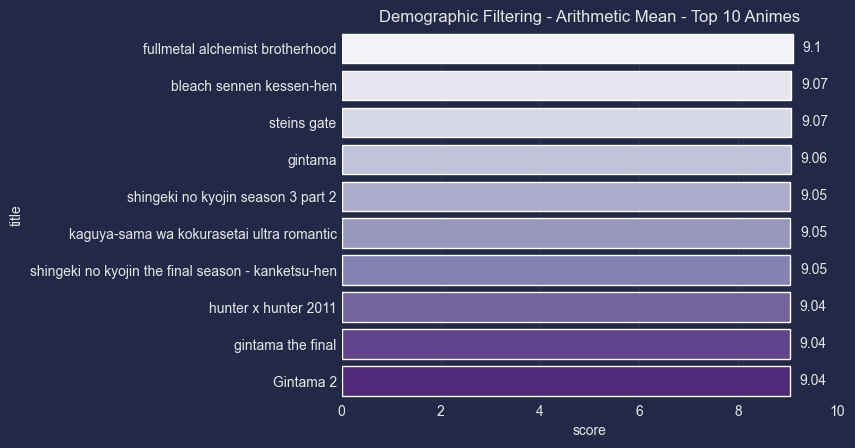

In [4]:
# ---- Top 10 Animes - Arithmetic Mean - Plot ----
plot_top_10_animes(arithmetic_mean_top_10_animes, 'Demographic Filtering - Arithmetic Mean - Top 10 Animes', 'score', 'title', 10)

<h1 id='3-cumulative-mean' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>✨ | Cumulative Mean</h1>

`Cumulative Mean` is an alternative to replace the Arithmetic Mean and avoid the previous problem. Its idea is simple, you just have to add up all elements, without dividing them by the number of elements. So, if an anime got two ratings of 10, we say that its Cumulative Mean is 20, whereas the Arithmetic Mean is 10. Equation:

```python
cumulative_mean = sum(x)
```

$$
\overline X = \sum_{i=1}^{n} (x)
$$

where:

- x: element value;
- n: total number of elements.

<br />

However, again we can stumble upon another problem. Consider an anime with 1,000,000 ratings of 1 score and another anime with 10,000 ratings of 10 score. Calculating their Cumulative Mean, the first one will have a score of 1,000,000, whereas the second will have a score of 100,000.

Even though having the better ratings, the anime can be in a bad rank position if the number of ratings is substancial lower than an anime with worse ratings and a huge number of votes. So, `there are situations the Cumulative Mean is not suitable and can compromise Recomendation Systems Models too`.

Another issue with Cumulative Rating is the fact that it generates an unbounded score. Ideally, any ranking system expects a normalized bounded score so that the system becomes predictable and consistent.

For now, let's see the animes that would be recommended when using this metric in Demographic Filtering.

In [5]:
# ---- Reading Dataset ----
ratings_df = pd.read_csv(f'{DATASETS_PATH}/users-scores-transformed-2023.csv')
ratings_df = ratings_df[['anime_id', 'anime_title', 'rating']]

In [6]:
# ---- Top 10 Animes - Cumulative Mean - Table ----
cumulative_mean_top_10_animes = ratings_df[['anime_title', 'rating']] \
    .groupby(by='anime_title')                                        \
    .sum()                                                            \
    .sort_values(by='rating', ascending=False).head(10)

cumulative_mean_top_10_animes.reset_index(inplace=True) # converts anime_title from index to column
cumulative_mean_top_10_animes

,anime_title,rating
0,death note,1079358
1,code geass hangyaku no lelouch,831298
2,fullmetal alchemist,764867
3,code geass hangyaku no lelouch r2,715537
4,bleach,688476
5,fullmetal alchemist brotherhood,685050
6,elfen lied,677388
7,naruto,664441
8,k-on,649103
9,sen to chihiro no kamikakushi,598610


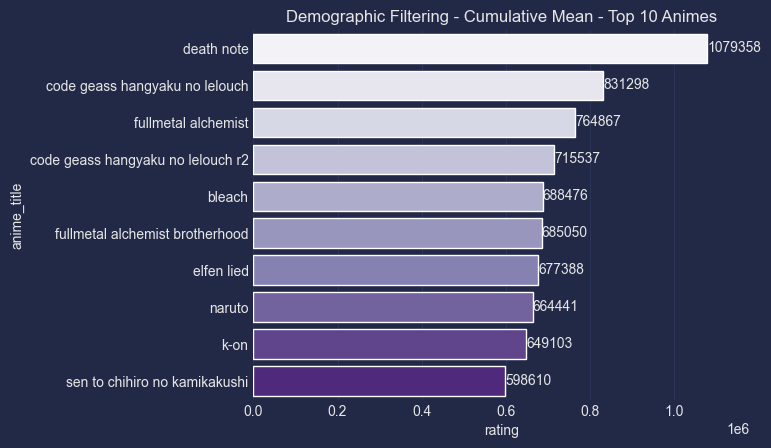

In [7]:
# ---- Top 10 Animes - Cumulative Mean - Plot ----
plot_top_10_animes(
    cumulative_mean_top_10_animes
    , 'Demographic Filtering - Cumulative Mean - Top 10 Animes'
    , 'rating'
    , 'anime_title'
    , cumulative_mean_top_10_animes.iloc[0].rating + 100000
)

Wow, realize that only changing the metric, the recommendations result are completely changed too!!

<h1 id='4-bayesian-mean' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>✨ | Bayesian Mean</h1>

Up to now, we have this two metric problems:

> **Arithmetic Mean** - `does not assume that an anime with lower score and huge number of ratings is better than an anime with higher score and only a few number of ratings`;

> **Cumulative Mean** - `does not assume that an anime with a lower score and huge number of good ratings is better than an anime with higher score and a more huge number of bad ratings`.

<br />

In order to solve these two problems and to give better, realistic mean scores, the `Bayesian Mean` has been created!! Its idea is simple, first we have to find the number of ratings of the item, the Arithmetic Mean of the item, the minimum number of ratings that an item must have to be considered in the system and the Arithmetic Mean across all items. After that, we apply them in the following equation:

```python
bayeasian_mean = ((v / (v + m)) * A) + ((m / (v + m)) * C)
```

$$
Bayesian Mean = \frac{v}{v + m} \cdot A + \frac{m}{v + m} \cdot C
$$

where:

- v: number of the item's ratings;
- m: minimum number of ratings that an item must have to be considered in the system;
- A: item's Arithmetic Mean;
- C: Arithmetic Mean across all items.

being:

- first part of the equation: the weight for the item's Arithmetic Mean;
- second part of the equation: the weight for the system's Arithmetic Mean.

<br />

Due to its good results, Bayesian Mean is used by IMDB to calculate the mean score of movies listed on the website.

Also, it is highly recommended to start using Arithmetic Mean when there are a few ratings to an item and smoothly migrate to Bayesian Mean accordingly the number of ratings increase.

Some observations about this metric:

- for an item with a fewer than average number of ratings - the score should be around the system’s Arithmetic Mean;
- for an item with a substantial number of ratings - the score should be the item’s Arithmetic Mean;
- as the number of ratings that an item receives increases, the score should gradually move from system’s Mean to item’s Mean.

Let's see what animes are recommended when using this metric and considered the 75th percentile (third quartile) as the minimum number of ratings that an item must have to be considered in the system.

In [8]:
# ---- Bayesian Mean: Getting Dataset ----
#
# About the interpolation techniques:
#
#  - linear: i + (j - i) * fraction, where fraction is the fractional part of the index surrounded by i and j;
#  - lower: i;
#  - higher: j;
#  - nearest: i or j whichever is nearest;
#  - midpoint: (i + j) / 2.
#
dataset_arithmetic_mean = animes_df.score.mean()
minimum_number_of_ratings = animes_df.scored_by.quantile(q=BAYESIAN_MEAN_QUANTILE, interpolation='linear')
bayesian_mean_top_10_animes = animes_df.loc[animes_df.scored_by >= minimum_number_of_ratings].copy()

In [9]:
# ---- Top 10 Animes - Bayesian Mean - Table ----
bayesian_mean_top_10_animes['bayesian_mean'] = bayesian_mean_top_10_animes.apply(
    lambda observation: bayesian_mean(observation, minimum_number_of_ratings, dataset_arithmetic_mean),
    axis=1
)

bayesian_mean_top_10_animes.sort_values(by='bayesian_mean', ascending=False, inplace=True)
bayesian_mean_top_10_animes = bayesian_mean_top_10_animes[['title', 'bayesian_mean']].head(10).copy()
bayesian_mean_top_10_animes

,title,bayesian_mean
id,,
5114,fullmetal alchemist brotherhood,9.051324
9253,steins gate,8.996858
38524,shingeki no kyojin season 3 part 2,8.983693
11061,hunter x hunter 2011,8.980936
28851,koe no katachi,8.876715
43608,kaguya-sama wa kokurasetai ultra romantic,8.837226
2904,code geass hangyaku no lelouch r2,8.826279
32281,kimi no na wa,8.797116
4181,clannad after story,8.780892


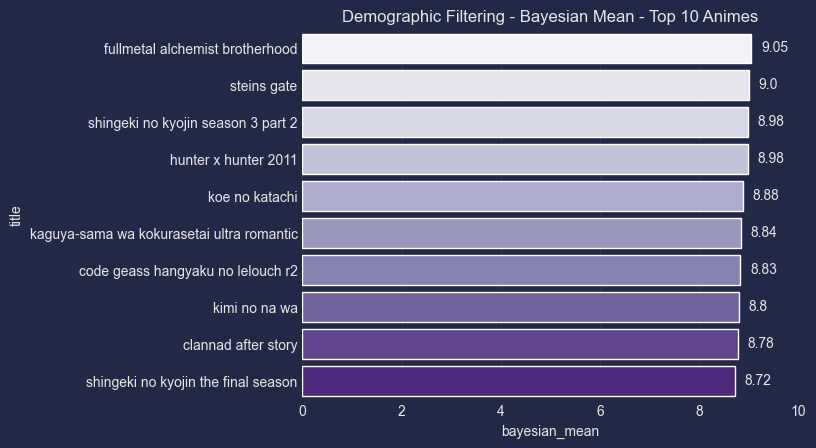

In [10]:
# ---- Top 10 Animes - Bayesian Mean - Plot ----
plot_top_10_animes(
    bayesian_mean_top_10_animes
    , 'Demographic Filtering - Bayesian Mean - Top 10 Animes'
    , 'bayesian_mean'
    , 'title'
    , 10
)

<h1 id='5-popularity' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>✨ | Popularity</h1>

Now let's head to the last metric: `Popularity`. I did not talked about it earlier because this metric is used to list the animes that `Everyone's Watching`, whereas the other metrics are used to list the animes `Most Liked Among the Users`.

In [11]:
# ---- Top 10 Animes - Popularity - Table ----
popularity_top_10_animes = animes_df.copy().sort_values(by='popularity', ascending=True)[['title', 'popularity']].head(10)
popularity_top_10_animes

,title,popularity
id,,
16498,shingeki no kyojin,1
1535,death note,2
5114,fullmetal alchemist brotherhood,3
30276,one punch man,4
11757,sword art online,5
31964,boku no hero academia,6
38000,kimetsu no yaiba,7
20,naruto,8
22319,tokyo ghoul,9


<h1 id='6-recommendation-results' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>✨ | Recommendation Results</h1>

So, as the final results, we choose the `Bayesian Mean` and `Popularity`, where the first one recommends the `most liked animes among the users` and the second recommends the `animes that everyone is watching` in the moment the dataset has been collected - October 6th.

Let's display the table of the final recommended animes:

In [12]:
# ---- Bayesian Mean (Most Liked Animes Among Users) ----
bayesian_mean_top_10_animes

,title,bayesian_mean
id,,
5114,fullmetal alchemist brotherhood,9.051324
9253,steins gate,8.996858
38524,shingeki no kyojin season 3 part 2,8.983693
11061,hunter x hunter 2011,8.980936
28851,koe no katachi,8.876715
43608,kaguya-sama wa kokurasetai ultra romantic,8.837226
2904,code geass hangyaku no lelouch r2,8.826279
32281,kimi no na wa,8.797116
4181,clannad after story,8.780892


In [13]:
# ---- Popularity (Everyone's Watching) ----
popularity_top_10_animes

,title,popularity
id,,
16498,shingeki no kyojin,1
1535,death note,2
5114,fullmetal alchemist brotherhood,3
30276,one punch man,4
11757,sword art online,5
31964,boku no hero academia,6
38000,kimetsu no yaiba,7
20,naruto,8
22319,tokyo ghoul,9


In the next notebook we will cover the Content Based Algorithm with Plot Descriptions, see ya!

---

<h1 id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</h1>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).